In [13]:
import pandas as pd
import string 
from nltk.corpus import stopwords
from nltk import word_tokenize
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer

In [14]:
docs=['The domestic dog (Canis familiaris or Canis lupus familiaris) is a domesticated descendant of the wolf. The dog derived from an ancient, extinct wolf, and the modern grey wolf is the dogs nearest living relative.',
     'I prefer cats.',
     'Dogs are fun.',
     'Dog is mans best friend',
     'Cats are selfish and quite.Cats are small. Cats are cute.',
     'Cats are selfish and annoying']


In [15]:
# Count Vector
vector=CountVectorizer(stop_words='english').fit(docs)
vocab=vector.get_feature_names()

dtm= vector.transform(docs)
df_dtm=pd.DataFrame(dtm.toarray(),columns=vocab)
df_dtm

,ancient,annoying,best,canis,cats,cute,derived,descendant,dog,dogs,...,lupus,mans,modern,nearest,prefer,quite,relative,selfish,small,wolf
0,1,0,0,2,0,0,1,1,2,1,...,1,0,1,1,0,0,1,0,0,3
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,3,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
5,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
# Converting CountVector to TfIdfVector using Transformer 

tf_idf_transformer=TfidfTransformer()

transformed_dtm=tf_idf_transformer.fit_transform(dtm)
df_transformed_dtm=pd.DataFrame(transformed_dtm)
#transformed_dtm
df_transformed_dtm

,0
0,"(0, 27)\t0.5273546634162115\n (0, 24)\t0.17..."
1,"(0, 22)\t0.8221903715494888\n (0, 4)\t0.569..."
2,"(0, 15)\t0.7732623667832087\n (0, 9)\t0.634..."
3,"(0, 19)\t0.5218234880251023\n (0, 14)\t0.52..."
4,"(0, 26)\t0.3538611209816208\n (0, 25)\t0.29..."
5,"(0, 25)\t0.5590215568768956\n (0, 4)\t0.471..."


In [17]:
# TfIdf Vector
vector=TfidfVectorizer(stop_words='english').fit(docs)
vocab=vector.get_feature_names()

dtm= vector.transform(docs)
df_dtm=pd.DataFrame(dtm.toarray(),columns=vocab)
df_dtm

,ancient,annoying,best,canis,cats,cute,derived,descendant,dog,dogs,...,lupus,mans,modern,nearest,prefer,quite,relative,selfish,small,wolf
0,0.175785,0.000000,0.000000,0.35157,0.000000,0.000000,0.175785,0.175785,0.288292,0.144146,...,0.175785,0.000000,0.175785,0.175785,0.00000,0.000000,0.175785,0.000000,0.000000,0.527355
1,0.000000,0.000000,0.000000,0.00000,0.569213,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.82219,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.634086,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.521823,0.00000,0.000000,0.000000,0.000000,0.000000,0.427903,0.000000,...,0.000000,0.521823,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.00000,0.734947,0.353861,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.353861,0.000000,0.290171,0.353861,0.000000
5,0.000000,0.681722,0.000000,0.00000,0.471964,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.559022,0.000000,0.000000


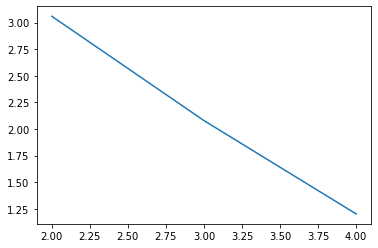

In [18]:
# Clustering Document
from sklearn.cluster import KMeans

n_clusters=[]
scores=[]
for i in range(2,5):
    n_clusters.append(i)
    model=KMeans(n_clusters=i).fit(dtm)
    score=model.inertia_
    scores.append(score)

plt.plot(n_clusters,scores)


In [19]:
model=KMeans(n_clusters=2).fit(dtm)
model.inertia_

3.0594450443048853

In [20]:
model.labels_

array([0, 1, 0, 0, 1, 1])

In [21]:
data=pd.DataFrame()
for x in docs:
    data=data.append({'doc':x},ignore_index=True)
data

,doc
0,The domestic dog (Canis familiaris or Canis lu...
1,I prefer cats.
2,Dogs are fun.
3,Dog is mans best friend
4,Cats are selfish and quite.Cats are small. Cat...
5,Cats are selfish and annoying


In [22]:
data['Label']=model.labels_

data

,doc,Label
0,The domestic dog (Canis familiaris or Canis lu...,0
1,I prefer cats.,1
2,Dogs are fun.,0
3,Dog is mans best friend,0
4,Cats are selfish and quite.Cats are small. Cat...,1
5,Cats are selfish and annoying,1


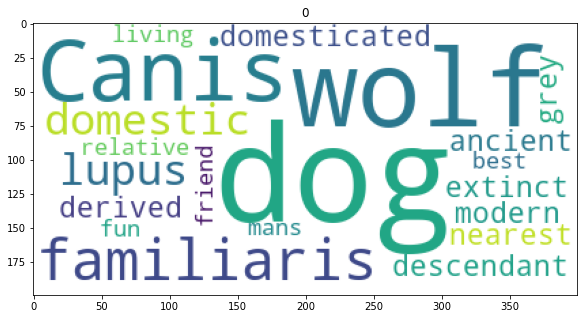

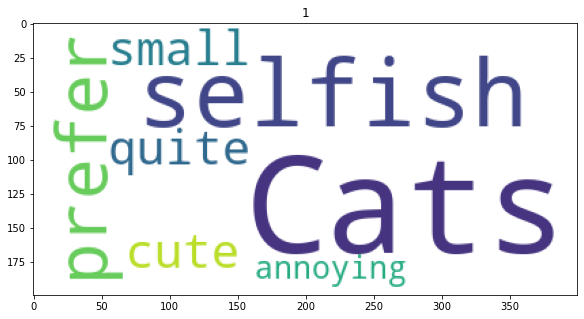

In [23]:
# Clustering

for label in data['Label'].unique():
    plt.figure(figsize=(14,5))
    cluster_review=data[data['Label']==label]['doc']
    doc=' '.join(cluster_review)
    wc=WordCloud(background_color='White').generate(doc)
    plt.imshow(wc)
    plt.title(label)
    
    

- Cluster 0 is dogs, Cluster 1 belongs to dogs !